# Introduction



# Dataset and Libraries setup

##Libraries and Dataset setup

Download the dataset and the libraries needed.

**Libraries**
- pandas
- numpy
- kaggle
- plotly

In [1]:
### Download files
! apt-get update > /dev/null
! apt-get upgrade > /dev/null
! apt-get install unzip > /dev/nulll

# Python libs
! pip install -q kaggle > /dev/null
! pip install plotly==4.14.3 > /dev/null
! pip install -U kaleido > /dev/null

Extracting templates from packages: 100%


Import plot and other useful libraries

In [2]:
### Import section

# Plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.graph_objects as go

# Others
import csv
from io import StringIO
from datetime import datetime

##Import dataset
There are two ways to download the dataset, one from kaggle using kaggle api the other one from github (the dataset may be out of date)

In [3]:
### Delete old folders and create new ones
! rm -r /content/data > /dev/null
! mkdir /content/data/ > /dev/null
! rm -r ~/.kaggle > /dev/null
! mkdir ~/.kaggle > /dev/null

rm: cannot remove '/content/data': No such file or directory
rm: cannot remove '/root/.kaggle': No such file or directory


### Kaggle

Connect to kaggle, download datataset and setup the files

In [4]:
### Kaggle download setup 

# Insert here the link to the token json file
! wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM' -P /content -O kaggle.json > /dev/null

# Copy token in the right folder
! cp kaggle.json ~/.kaggle/ > /dev/null
! chmod 600 ~/.kaggle/kaggle.json > /dev/null

# Download dataset
! kaggle datasets download -d fedesoriano/company-bankruptcy-prediction -p /content/data > /dev/null

# Unzip and remove the zip
! unzip /content/data/company-bankruptcy-prediction.zip -d /content/data > /dev/null
! rm /content/data/company-bankruptcy-prediction.zip > /dev/null

--2021-09-08 09:55:23--  https://docs.google.com/uc?export=download&id=1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM
Resolving docs.google.com (docs.google.com)... 74.125.195.138, 74.125.195.100, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.138|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-04-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ckoctjhabcg1oubi8p4jjqh84gs0grtr/1631094900000/08916338998030749634/*/1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM?e=download [following]
--2021-09-08 09:55:24--  https://doc-04-5s-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ckoctjhabcg1oubi8p4jjqh84gs0grtr/1631094900000/08916338998030749634/*/1-4sfcaQg3DdP6ZoRnm0uFvM5VlMhPDSM?e=download
Resolving doc-04-5s-docs.googleusercontent.com (doc-04-5s-docs.googleusercontent.com)... 74.125.20.132, 2607:f8b0:400e:c07::84
Connecting to doc-04-5s-docs.googleusercontent.com (doc-04-5s-do

### Github
Connect to Github, download datataset and setup the files

In [5]:
# ### Download dataset from github repository

# # Donwload all the files
# ! wget -P /content/data https://raw.githubusercontent.com/thisispivi/Deep-Learning-Company-Bankruptcy-Prediction/main/data/data.zip

# # Unzip and remove the zip
# ! unzip /content/data/data.zip -d /content/data
# ! rm /content/data/data.zip

## Read Files
In this section we import the csv files.

In [6]:
df = pd.read_csv('data/data.csv')
df.isnull().sum()
df.duplicated().sum()
rows, cols = df.shape

Split the dataset

In [7]:
labels = df['Bankrupt?']
data = df.drop(['Bankrupt?'], axis=1)

# Deep Learning

In [81]:
from tensorflow import keras
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler

## Analyze dataset

In this section we will analyze the dataset shape, balance and if it has null values in its rows

### Shape

Check the shape of the dataset

In [9]:
print('Data shape:', data.shape)
print('Labels shape:', labels.shape)

Data shape: (6819, 95)
Labels shape: (6819,)


### Null values

Check if there are null values

In [10]:
df.isnull().sum(axis = 0)

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

There are no null values so we don't have to deal with them

### Balance

Check if the dataset is balanced

In [11]:
result = df['Bankrupt?'].value_counts()
zero_percentage = round((result[0]*100)/(result[0]+result[1]),2)
print("No. of 0: "+ str(result[0]) + "\nNo. of 1: " + str(result[1]) + 
      "\nPercentage of 0: "+ str(zero_percentage)+ " %\nPercentage of 1: "+
      str(round((100-zero_percentage),2))+" %")

No. of 0: 6599
No. of 1: 220
Percentage of 0: 96.77 %
Percentage of 1: 3.23 %


Text(0.5, 1.0, 'Number of No Bankrupt rows vs number of Bankrupt rows ')

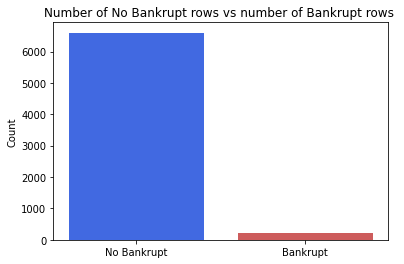

In [12]:
plt.bar(x=["No Bankrupt", "Bankrupt"], height=[result[0], result[1]], color=["royalblue", "indianred"])
plt.ylabel("Count")
plt.title("Number of No Bankrupt rows vs number of Bankrupt rows ")

Text(0.5, 1.0, 'Percentage of No Bankrupt vs percentage of Bankrupt')

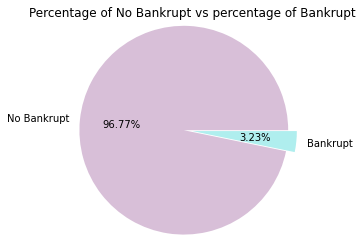

In [13]:
plt.pie([result[0], result[1]], labels=["No Bankrupt", "Bankrupt"], explode=(0.1, 0), autopct='%1.2f%%', colors=["thistle", "paleturquoise"], radius=1.2)
plt.title("Percentage of No Bankrupt vs percentage of Bankrupt")

The dataset is not balanced. If we don't fix this when we will run the model we will have a perfect accuracy, because the network will concentrate only on the major class.

## Normalize values

In this section we want to normalize the values, so we take the colums with values over 1 and with values less than 0 and we normalize them using *StandardScaler()*. This scaler uses the mean and the standard deviation to set all values to between 0 and 1.

In [14]:
### Normalize values

# Take the columns with values over 1
cols_for_scale = df.max()[df.max()>1]
# Take the columns with values less than 0
df.min()[df.min()<0] # It is none there aren't negative values
# Normalize values
scale = StandardScaler()
scaled = scale.fit_transform(df[cols_for_scale.keys()])
# Substitute the old values with the normalized ones
i = 0
for column in cols_for_scale.keys():
    df[column] = scaled[:,i]
    i += 1
# Update labels and data
labels = df['Bankrupt?']
data = df.drop(['Bankrupt?'], axis=1)

## Balance Dataset using SMOTE
To balance the dataset we use SMOTE (Synthetic Minority Oversampling Technique).

[Link](https://towardsdatascience.com/applying-smote-for-class-imbalance-with-just-a-few-lines-of-code-python-cdf603e58688)

Import SMOTE and resample the data

In [15]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
data_new, labels_new = sm.fit_resample(data, labels)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Check the shapes

In [16]:
print('Data shape:', data_new.shape)
print('Labels shape:', labels_new.shape)

Data shape: (13198, 95)
Labels shape: (13198,)


In [17]:
new_df = pd.DataFrame(labels_new)
result = new_df[0].value_counts()
zero_percentage = round((result[0]*100)/(result[0]+result[1]),2)
print("No. of 0: "+ str(result[0]) + "\nNo. of 1: " + str(result[1]) + 
      "\nPercentage of 0: "+ str(zero_percentage)+ " %\nPercentage of 1: "+
      str(round((100-zero_percentage),2))+" %")

No. of 0: 6599
No. of 1: 6599
Percentage of 0: 50.0 %
Percentage of 1: 50.0 %


Text(0.5, 1.0, 'Number of No Bankrupt rows vs number of Bankrupt rows ')

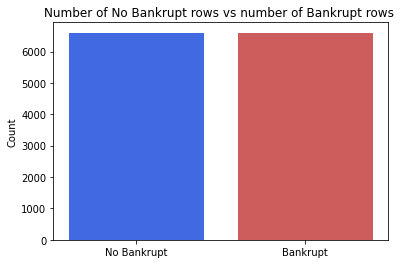

In [18]:
plt.bar(x=["No Bankrupt", "Bankrupt"], height=[result[0], result[1]], color=["royalblue", "indianred"])
plt.ylabel("Count")
plt.title("Number of No Bankrupt rows vs number of Bankrupt rows ")

Text(0.5, 1.0, 'Percentage of No Bankrupt vs percentage of Bankrupt')

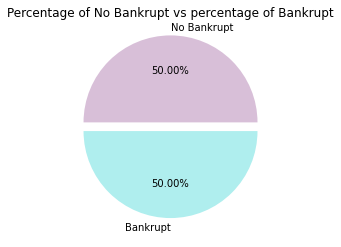

In [19]:
plt.pie([result[0], result[1]], labels=["No Bankrupt", "Bankrupt"], explode=(0.1, 0), autopct='%1.2f%%', colors=["thistle", "paleturquoise"], radius=1)
plt.title("Percentage of No Bankrupt vs percentage of Bankrupt")

As we can see the dataset is perfectly balanced.

## Split data into training, validation and test set

Split the data in:
* x_train: The training set data
* y_train: The training set label
* x_valid: The validation set data
* y_valid: The validation set label
* x_test: The validation set data
* y_test: The validation set label

The dimension will be something like

* Training: 70%
* Validation: 20%
* Test: 10%

In [45]:
x_train, x_test, y_train, y_test = train_test_split(data_new, labels_new, train_size=0.9)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, train_size=0.8)

Print all the sizes

In [46]:
print('Train data shape:', x_train.shape)
print('Train labels shape:', y_train.shape)
print('Validation data shape:', x_valid.shape)
print('Validation labels shape:', y_valid.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

Train data shape: (9502, 95)
Train labels shape: (9502,)
Validation data shape: (2376, 95)
Validation labels shape: (2376,)
Test data shape: (1320, 95)
Test labels shape: (1320,)


## Create New Model

### Options

In this section there are some boolean variables to tune what the code will do:

* train_model -> True: the network will be trained / False: network wont' be trained
* model_loss -> True: plot the model loss / False: don't plot the model loss
* model_accuracy -> True: plot the model accuracy / False: don't plot the model accuracy
* evaluate_model -> True: evaluate the model / False: don't evaluate the model
* conf_matr -> True: plot the confusion matrix / False: don't plot the confusion matrix
* plot_model -> True: plot the structure of the network / False: don't plot the structure of the network
* save_model -> True: save the model / False: don't save the model

In [145]:
train_model = True
model_loss = True
model_accuracy = True
evaluate_model = True
conf_matr = True
plot_model = True
save_model = False

### Create the network

In [58]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_shape=(95,)))
model.add(keras.layers.Dense(64,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(16,kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'))
model.add(keras.layers.Dense(1, activation='sigmoid'))
optimizer = keras.optimizers.RMSprop(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

### Train the network

In [59]:
if train_model == True:
  history = model.fit(x_train, y_train, epochs=200, validation_data=(x_valid,y_valid))

Epoch 1/200
297/297 [==============================] - 2s 3ms/step - loss: 0.7270 - accuracy: 0.6348 - val_loss: 0.5263 - val_accuracy: 0.8371
Epoch 2/200
297/297 [==============================] - 1s 2ms/step - loss: 0.4774 - accuracy: 0.8292 - val_loss: 0.3555 - val_accuracy: 0.8855
Epoch 3/200
297/297 [==============================] - 1s 2ms/step - loss: 0.3839 - accuracy: 0.8712 - val_loss: 0.3244 - val_accuracy: 0.8902
Epoch 4/200
297/297 [==============================] - 1s 2ms/step - loss: 0.3399 - accuracy: 0.8890 - val_loss: 0.2959 - val_accuracy: 0.8977
Epoch 5/200
297/297 [==============================] - 1s 2ms/step - loss: 0.3159 - accuracy: 0.8968 - val_loss: 0.2881 - val_accuracy: 0.8998
Epoch 6/200
297/297 [==============================] - 1s 2ms/step - loss: 0.3035 - accuracy: 0.8997 - val_loss: 0.3106 - val_accuracy: 0.8927
Epoch 7/200
297/297 [==============================] - 1s 2ms/step - loss: 0.2826 - accuracy: 0.9034 - val_loss: 0.2591 - val_accuracy: 0.9179

### Loss of the model

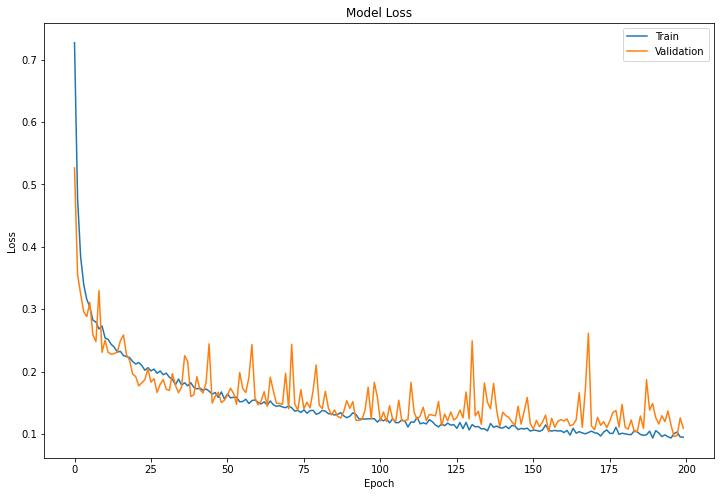

In [151]:
if model_loss == True:
  plt.subplots(figsize=(12,8))
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='upper right')
  plt.show()

### Accuracy of the model

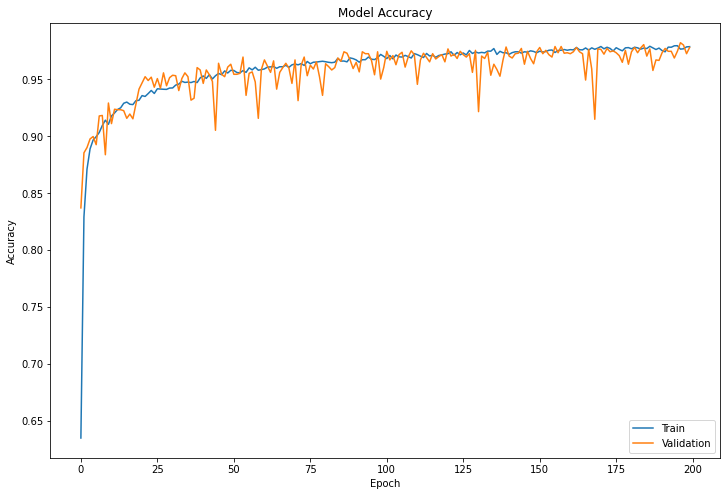

In [149]:
if model_accuracy == True:
  plt.subplots(figsize=(12,8))
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Validation'], loc='lower right')
  plt.show()

### Evaluate the model


In [112]:
if evaluate_model == True:
  model.evaluate(x_test, y_test)

42/42 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9750


### Confusion Matrix

Compute the label prediction using the test set and plot the confusion matrix.

              precision    recall  f1-score   support

           0       1.00      0.95      0.98       688
           1       0.95      1.00      0.97       632

    accuracy                           0.97      1320
   macro avg       0.98      0.98      0.97      1320
weighted avg       0.98      0.97      0.98      1320



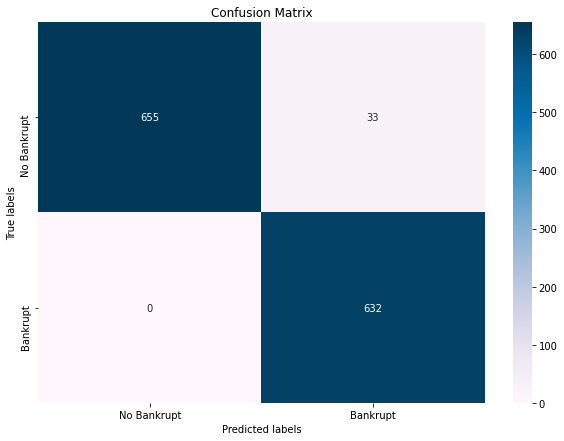

In [144]:
if conf_matr == True:
  predictions = model.predict(x_test)
  classes = predictions > 0.5
  cm = confusion_matrix(y_test,classes)

  # Plot
  plt.figure(figsize=(10,7))
  ax = plt.subplot()
  sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap="PuBu");  # annot=True to annotate cells, ftm='g' to disable scientific notation
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix'); 
  ax.xaxis.set_ticklabels(['No Bankrupt', 'Bankrupt']); ax.yaxis.set_ticklabels(['No Bankrupt', 'Bankrupt']);
  print(classification_report(y_test,classes))

### Plot model

In [146]:
if plot_model == True:
  dot_img_file = "network.png"
  keras.utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

### Save the model

In [82]:
if save_model == True:
  file_name = 'acc_97'
  model.save(file_name)

# ! zip -r model.zip acc_97/

INFO:tensorflow:Assets written to: azz/assets
	zip warning: name not matched: folder

zip error: Nothing to do! (try: zip -r model.zip . -i folder)


## Load the model

In [ ]:
model.evaluate(x_test,y_test)

42/42 [==============================] - 0s 1ms/step - loss: 0.1229 - accuracy: 0.9750


[0.12291677296161652, 0.9750000238418579]

In [ ]:
model.save('acc_97')

INFO:tensorflow:Assets written to: acc_97/assets


In [ ]:
! zip -r model.zip acc_97/

updating: acc_97/ (stored 0%)
updating: acc_97/saved_model.pb (deflated 90%)
updating: acc_97/assets/ (stored 0%)
updating: acc_97/keras_metadata.pb (deflated 90%)
updating: acc_97/variables/ (stored 0%)
updating: acc_97/variables/variables.index (deflated 65%)
updating: acc_97/variables/variables.data-00000-of-00001 (deflated 27%)
